In [1]:
data ='../Loan_status_2007-2020Q3.gzip'
# Files in dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import zipfile

# Pandas display options
pd.set_option('display.max_column', 500)
pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_info_column',500)
pd.set_option('display.max_info_rows',2000)
pd.set_option('display.expand_frame_repr',True)
pd.set_option('display.width',2000)
pd.set_option('display.max_rows',500)

import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install xlrd

In [8]:
!pip install openpyxl

In [15]:
data_info = pd.read_excel('../downloads/LCDataDictionary.xlsx',
                          usecols = ['LoanStatNew','Description'],index_col=0)
data_info.head()

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.


In [16]:
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [17]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [18]:
feat_info('annual_inc')

The self-reported annual income provided by the borrower during registration.


In [19]:
feat_info('funded_amnt')

The total amount committed to that loan at that point in time.


In [25]:
df_scan = pd.read_csv('..\Downloads\Loan_status_2007-2020Q3.gzip.zip', nrows=10000, low_memory=False)
df_scan.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704,700,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-1999,740,744,5,NaN,NaN,3,0,1687,9.4%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499,0,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,735,739,2,NaN,NaN,2,0,2956,98.5%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun

In [26]:
df_scan.shape

(10000, 142)

In [27]:
df_scan.issue_d.value_counts()

Dec-2011    2267
Nov-2011    2232
Oct-2011    2118
Sep-2011    2067
Aug-2011    1316
Name: issue_d, dtype: int64

In [28]:
df_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 142 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    Unnamed: 0                                  int64  
 1    id                                          int64  
 2    loan_amnt                                   int64  
 3    funded_amnt                                 int64  
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    object 
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc     

In [29]:
df_scan.loan_status.value_counts()

Fully Paid     8429
Charged Off    1571
Name: loan_status, dtype: int64

In [30]:
df_scan['Charged_off'] = df_scan.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [31]:
df_scan.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,Charged_off
0,0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704,700,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0
1,1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-1999,740,744,5,NaN,NaN,3,0,1687,9.4%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499,0,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1
2,2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,735,739,2,NaN,NaN,2,0,2956,98.5%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0

In [32]:
df_scan.corr()['Charged_off'].sort_values(ascending=False)

Charged_off                                   1.000000
recoveries                                    0.368135
collection_recovery_fee                       0.266003
total_rec_late_fee                            0.134564
inq_last_6mths                                0.067429
loan_amnt                                     0.060530
funded_amnt_inv                               0.059716
funded_amnt                                   0.059157
pub_rec                                       0.049188
dti                                           0.047124
pub_rec_bankruptcies                          0.043977
id                                            0.040318
installment                                   0.034380
mths_since_last_record                        0.026285
delinq_2yrs                                   0.025272
total_rec_int                                 0.010236
mths_since_last_delinq                        0.006358
open_acc                                     -0.006175
revol_bal 

In [36]:
selected_feat=['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership',
              'annual_inc','verification_status','issue_d','purpose','title','dti','earliest_cr_line','inq_last_6mths',
              'open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc',
              'last_pymnt_amnt', 'pub_rec_bankruptcies', 'addr_state', 'fico_range_low','fico_range_high','loan_status']

In [37]:
len(selected_feat)

31

In [38]:
selected_feat=sorted(selected_feat)

In [39]:
data_info.loc[selected_feat]

,Description
LoanStatNew,
addr_state,The state provided by the borrower in the loan application
annual_inc,The self-reported annual income provided by the borrower during registration.
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
earliest_cr_line,The month the borrower's earliest reported credit line was opened
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title,The job title supplied by the Borrower when applying for the loan.*
fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.


In [40]:
df=pd.read_csv('../Downloads/Loan_status_2007-2020Q3.gzip.zip',usecols=selected_feat)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies
0,5000.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,Computer,AZ,27.65,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,171.62,Individual,NaN,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,bike,GA,1.00,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,119.66,Individual,NaN,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,IL,8.72,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,649.91,Individual,NaN,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,personel,CA,20.00,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,357.48,Individual,NaN,0.0
4,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,other,Personal,OR,17.94,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,67.30,Individual,NaN,0.0


In [41]:
df.shape

(2925493, 31)

In [44]:
df[df.issue_d=='Aug-2007'].shape

(74, 31)

In [45]:
df.groupby('issue_d')['loan_status'].value_counts().head(100)

issue_d   loan_status                                        
Apr-2008  Fully Paid                                               128
          Does not meet the credit policy. Status:Fully Paid        68
          Does not meet the credit policy. Status:Charged Off       36
          Charged Off                                               27
Apr-2009  Fully Paid                                               250
          Charged Off                                               40
          Does not meet the credit policy. Status:Fully Paid        34
          Does not meet the credit policy. Status:Charged Off        9
Apr-2010  Fully Paid                                               745
          Charged Off                                               82
          Does not meet the credit policy. Status:Fully Paid        66
          Does not meet the credit policy. Status:Charged Off       19
Apr-2011  Fully Paid                                              1341
          Charg

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              object 
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  addr_state            object 
 16  dti                   float64
 17  earliest_cr_line      object 
 18  fico_range_low        float64
 19  fico_range_high       float64
 20  inq_last_6mths        float64
 21  open_acc              float64
 22  pub_rec               float64
 23  revol_b

In [47]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'last_pymnt_amnt', 'application_type', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object')

In [49]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

emp_title               9.03
emp_length              7.01
mort_acc                1.71
title                   0.80
dti                     0.11
revol_util              0.09
pub_rec_bankruptcies    0.05
initial_list_status     0.00
fico_range_low          0.00
last_pymnt_amnt         0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
inq_last_6mths          0.00
application_type        0.00
fico_range_high         0.00
total_acc               0.00
loan_amnt               0.00
earliest_cr_line        0.00
term                    0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
addr_state              0.00
dtype: float64

In [50]:
feat_info('loan_status')

Current status of the loan


In [51]:
feat_info('addr_state')

The state provided by the borrower in the loan application


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2925492.0,15358.775105,9478.383451,500.00,8000.00,13000.00,20000.0000,4.000000e+04
installment,2925492.0,452.391358,272.947849,4.93,253.50,382.30,603.9200,1.719830e+03
annual_inc,2925488.0,79937.274015,111747.608711,0.00,47000.00,66000.00,95000.0000,1.100000e+08
dti,2922384.0,19.296480,15.719773,-1.00,12.08,18.10,24.8800,9.990000e+02
fico_range_low,2925492.0,700.511030,33.765652,610.00,675.00,695.00,720.0000,8.450000e+02
fico_range_high,2925492.0,704.511235,33.766533,614.00,679.00,699.00,724.0000,8.500000e+02
inq_last_6mths,2925462.0,0.554213,0.859975,0.00,0.00,0.00,1.0000,3.300000e+01
open_acc,2925463.0,11.676163,5.733312,0.00,8.00,11.00,15.0000,1.040000e+02
pub_rec,2925463.0,0.176285,0.524376,0.00,0.00,0.00,0.0000,8.600000e+01
revol_bal,2925492.0,16964.840934,22996.213652,0.00,5993.00,11493.00,20644.0000,2.904836e+06


In [53]:
df.loan_status.value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Loan Status Value Distribution')

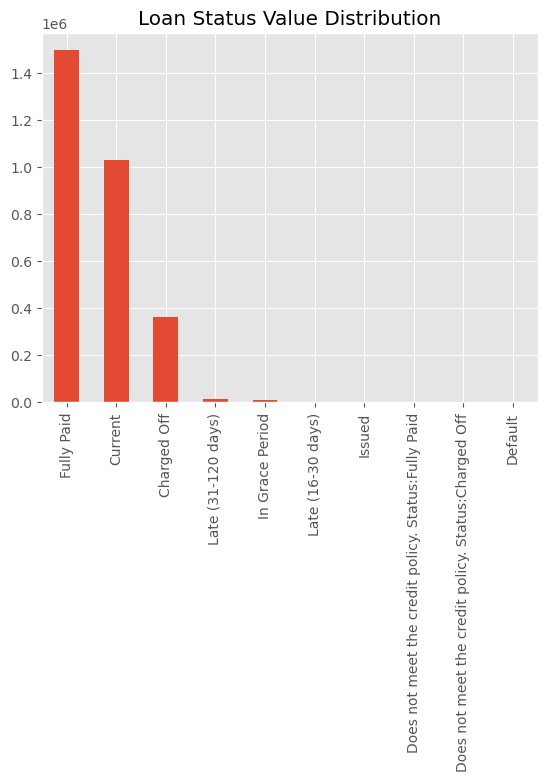

In [54]:
df.loan_status.value_counts().plot.bar()
plt.title('Loan Status Value Distribution')

In [55]:
df=df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [56]:
df.shape

(1860331, 31)

In [57]:
print(df.loan_status.value_counts(),'\n')
print(df.loan_status.value_counts(normalize=True))

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64 

Fully Paid     0.805116
Charged Off    0.194884
Name: loan_status, dtype: float64


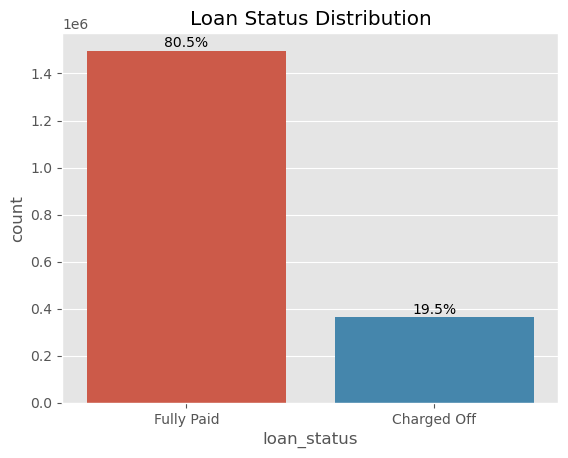

In [58]:
ax=sns.countplot(x='loan_status',data=df)
total=len(df)
for p in ax.patches:
    percentage=f'{100*p.get_height()/total:.1f}%\n'
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='center')
    
plt.title('Loan Status Distribution')
plt.show()

In [61]:
df['Charged_Off']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df.drop('loan_status',axis=1, inplace=True)

Text(0.5, 1.0, 'Loan Amount Distribution')

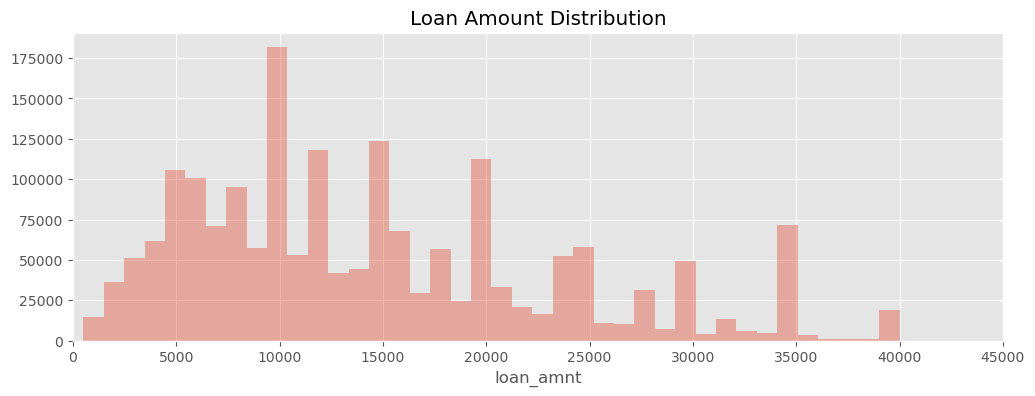

In [62]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False, bins=40)
plt.xlim(0,45000)
plt.title('Loan Amount Distribution')

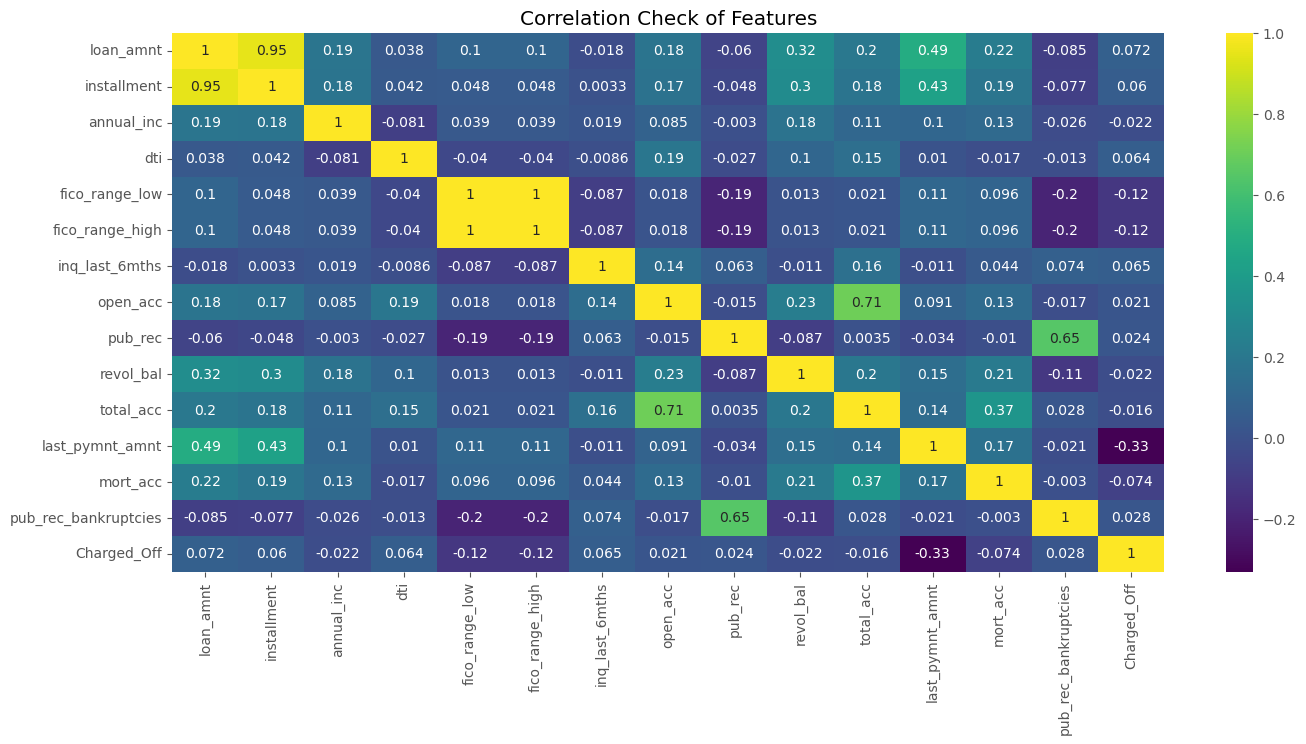

In [66]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Check of Features');

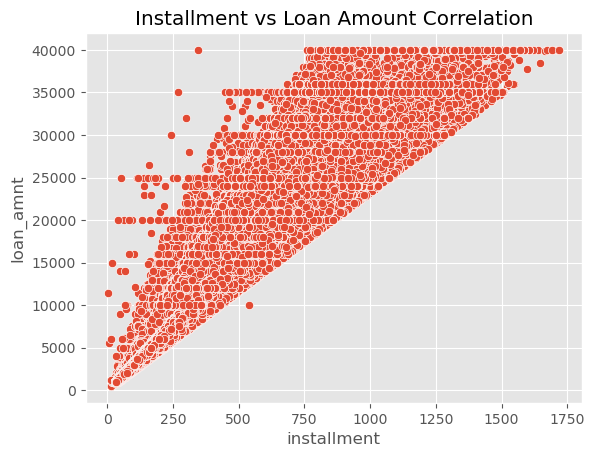

In [67]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
plt.title('Installment vs Loan Amount Correlation');

In [68]:
df.drop(['installment',
        'total_acc',
        'pub_rec',
        ],axis=1, inplace=True)

<AxesSubplot:xlabel='Charged_Off', ylabel='loan_amnt'>

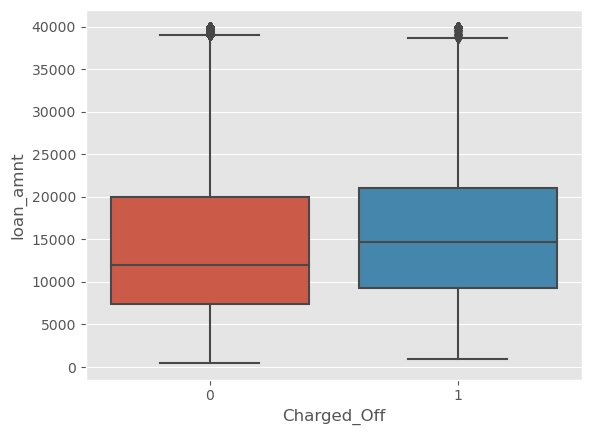

In [69]:
sns.boxplot(x='Charged_Off', y='loan_amnt',data=df)

In [70]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

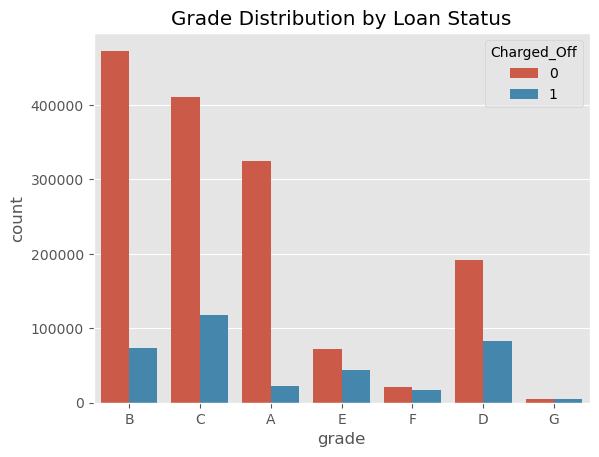

In [71]:
sns.countplot(x='grade',data=df,hue='Charged_Off')
plt.title('Grade Distribution by Loan Status');

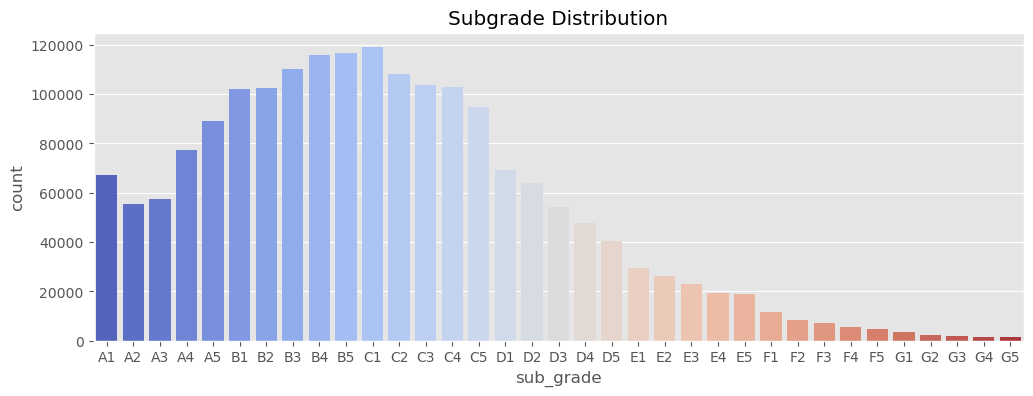

In [73]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')
plt.title('Subgrade Distribution');

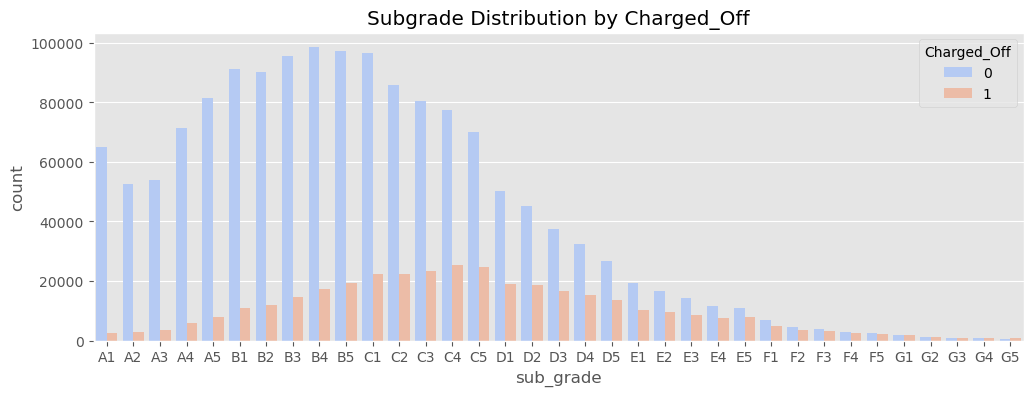

In [74]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='Charged_Off')
plt.title('Subgrade Distribution by Charged_Off');

In [75]:
df.drop('grade',axis=1,inplace=True)

In [76]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
sub_grade               0.000000
emp_title               7.066162
emp_length              6.299739
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.150655
addr_state              0.000000
dti                     0.059559
earliest_cr_line        0.000000
fico_range_low          0.000000
fico_range_high         0.000000
inq_last_6mths          0.000054
open_acc                0.000000
revol_bal               0.000000
revol_util              0.075148
initial_list_status     0.000000
last_pymnt_amnt         0.000000
application_type        0.000000
mort_acc                2.541537
pub_rec_bankruptcies    0.037466
Charged_Off             0.000000
dtype: float64

In [77]:
df.shape

(1860331, 27)

In [78]:
df.emp_title.value_counts()

Teacher                        30748
Manager                        27960
Owner                          15903
Registered Nurse               12592
RN                             12098
                               ...  
Program Tech II                    1
afcp                               1
Truck driver owner/operator        1
Primary teaher                     1
Contact input                      1
Name: emp_title, Length: 456676, dtype: int64

In [79]:
df.drop('emp_title',axis=1,inplace=True)

In [80]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [81]:
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

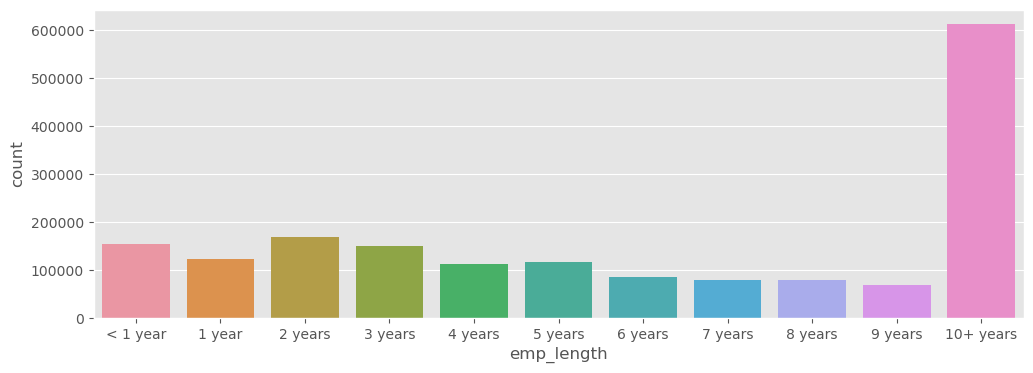

In [82]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

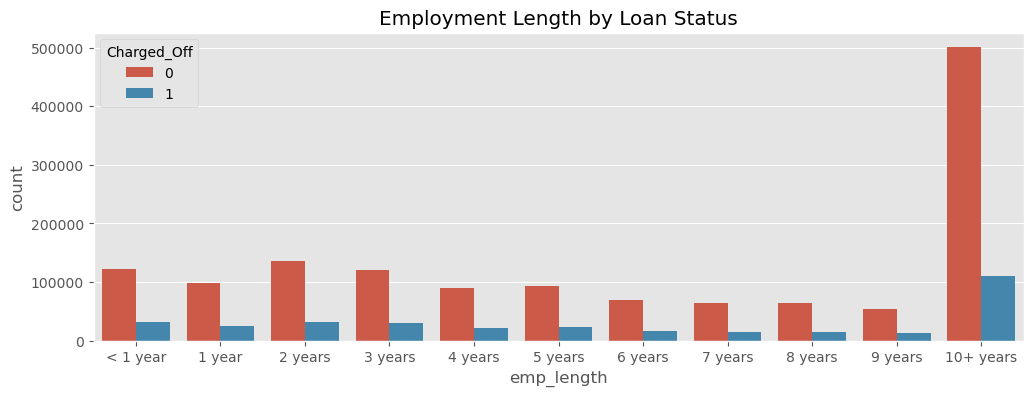

In [83]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df,order=emp_length_order,hue='Charged_Off')
plt.title('Employment Length by Loan Status');

In [84]:
emp_co = df[df['Charged_Off']==1].groupby('emp_length').count()['Charged_Off']
emp_fp = df[df['Charged_Off']==0].groupby('emp_length').count()['Charged_Off']

In [85]:
emp_co

emp_length
1 year        24682
10+ years    110783
2 years       32426
3 years       29172
4 years       21904
5 years       22400
6 years       16091
7 years       14851
8 years       15148
9 years       12694
< 1 year      31674
Name: Charged_Off, dtype: int64

In [86]:
emp_fp

emp_length
1 year        98242
10+ years    500547
2 years      136090
3 years      120099
4 years       90307
5 years       93472
6 years       69263
7 years       63290
8 years       63498
9 years       54476
< 1 year     122026
Name: Charged_Off, dtype: int64

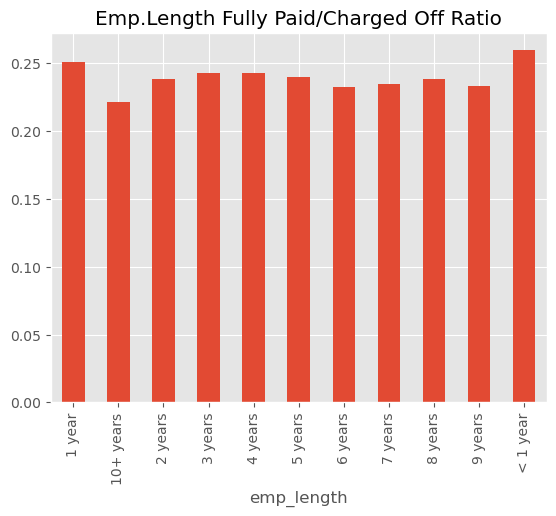

In [87]:
(emp_co/emp_fp).plot(kind='bar')
plt.title('Emp.Length Fully Paid/Charged Off Ratio');

In [88]:
df = df.drop('emp_length', axis=1)

In [91]:
round(df.isnull().sum()/len(df),2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
sub_grade               0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
purpose                 0.00
title                   0.01
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
fico_range_low          0.00
fico_range_high         0.00
inq_last_6mths          0.00
open_acc                0.00
revol_bal               0.00
revol_util              0.00
initial_list_status     0.00
last_pymnt_amnt         0.00
application_type        0.00
mort_acc                0.03
pub_rec_bankruptcies    0.00
Charged_Off             0.00
dtype: float64

In [92]:
df.dropna(inplace=True)

In [93]:
df.isnull().sum().sum()

0

In [94]:
feat_info('title')

The loan title provided by the borrower


In [95]:
df['title'].value_counts()

Debt consolidation                 939555
Credit card refinancing            366042
Home improvement                   110849
Other                              101936
Major purchase                      36207
                                    ...  
 Stress Relief                          1
Controlling Debt                        1
debt consodation                        1
Wedding and Credit card pay off         1
Credit Card/Auto Repair                 1
Name: title, Length: 44031, dtype: int64

In [96]:
df['purpose'].value_counts()

debt_consolidation    1026416
credit_card            400859
home_improvement       119059
other                  108063
major_purchase          38921
medical                 21511
car                     18245
small_business          18076
vacation                12731
moving                  12428
house                   10538
wedding                  1253
renewable_energy         1130
educational                 2
Name: purpose, dtype: int64

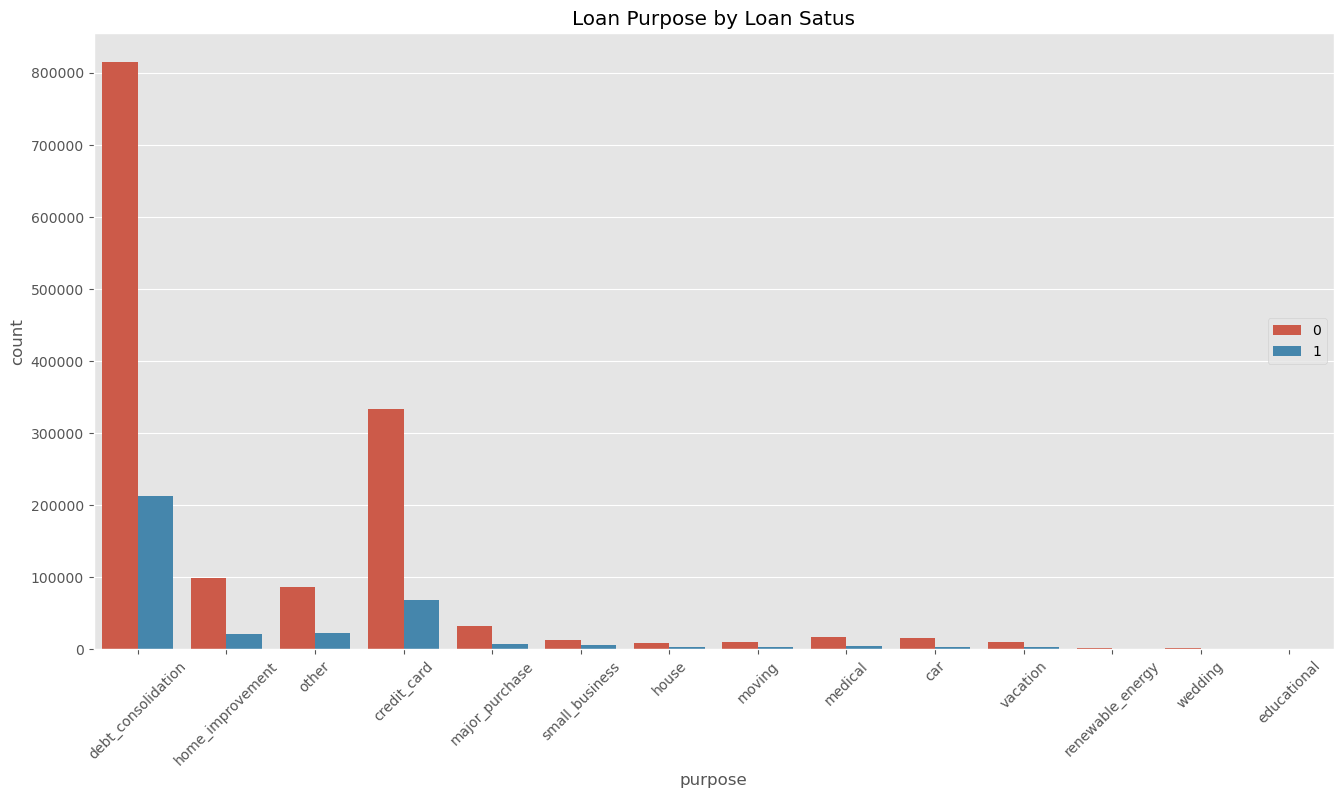

In [97]:
plt.figure(figsize=(16,8))
sns.countplot(x='purpose',data=df,hue='Charged_Off')
plt.xticks(rotation=45)
plt.legend(loc=5)
plt.title('Loan Purpose by Loan Satus');

In [98]:
df.drop('title', axis=1, inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789232 entries, 42536 to 2925492
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              object 
 3   sub_grade             object 
 4   home_ownership        object 
 5   annual_inc            float64
 6   verification_status   object 
 7   issue_d               object 
 8   purpose               object 
 9   addr_state            object 
 10  dti                   float64
 11  earliest_cr_line      object 
 12  fico_range_low        float64
 13  fico_range_high       float64
 14  inq_last_6mths        float64
 15  open_acc              float64
 16  revol_bal             float64
 17  revol_util            object 
 18  initial_list_status   object 
 19  last_pymnt_amnt       float64
 20  application_type      object 
 21  mort_acc              float64
 22  pub_rec_bankruptcies  float64
 23  Cha

In [100]:
df.shape

(1789232, 24)

In [101]:
df.select_dtypes(['object']).columns

Index(['term', 'int_rate', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'application_type'], dtype='object')

In [102]:
df['term'].value_counts()

 36 months    1340421
 60 months     448811
Name: term, dtype: int64

In [103]:
df['term'] = df['term'].apply(lambda term: int(term[ :3]))

In [104]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,Charged_Off
42536,12000.0,36,10.99%,B2,RENT,60000.0,Not Verified,Dec-2013,debt_consolidation,NC,4.62,Dec-2009,720.0,724.0,1.0,15.0,7137.0,24%,f,3775.55,Individual,0.0,0.0,0
42537,4800.0,36,10.99%,B2,MORTGAGE,39600.0,Source Verified,Dec-2013,home_improvement,TX,2.49,Aug-1995,755.0,759.0,2.0,3.0,4136.0,16.1%,w,3900.48,Individual,0.0,0.0,0
42538,27050.0,36,10.99%,B2,OWN,55000.0,Verified,Dec-2013,debt_consolidation,MI,22.87,Oct-1986,730.0,734.0,0.0,14.0,36638.0,61.2%,w,6074.19,Individual,4.0,0.0,0
42539,12000.0,36,7.62%,A3,MORTGAGE,96500.0,Not Verified,Dec-2013,debt_consolidation,TX,12.61,Sep-2003,705.0,709.0,0.0,17.0,13248.0,55.7%,f,2927.22,Individual,1.0,0.0,0
42540,14000.0,36,12.85%,B4,RENT,88000.0,Not Verified,Dec-2013,debt_consolidation,NC,10.02,Jun-1988,670.0,674.0,0.0,6.0,3686.0,81.9%,f,470.47,Individual,0.0,1.0,0


In [105]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df.drop('earliest_cr_line',axis=1,inplace=True)

In [106]:
df.earliest_cr_year.dtype

dtype('int64')

In [107]:
df['issue_d']=df['issue_d'].apply(lambda date:int(date[-4:]))

NameError: name 'Plt' is not defined

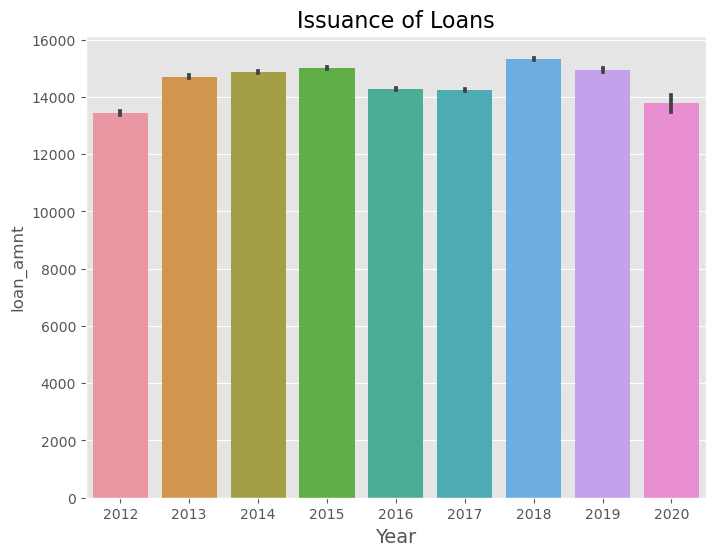

In [108]:
plt.figure(figsize=(8,6))
sns.barplot(x='issue_d',y='loan_amnt',data=df)
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
Plt.ylabel('Average loan amount issued', fontsize=14)

In [109]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,Charged_Off,earliest_cr_year
42536,12000.0,36,10.99%,B2,RENT,60000.0,Not Verified,2013,debt_consolidation,NC,4.62,720.0,724.0,1.0,15.0,7137.0,24%,f,3775.55,Individual,0.0,0.0,0,2009
42537,4800.0,36,10.99%,B2,MORTGAGE,39600.0,Source Verified,2013,home_improvement,TX,2.49,755.0,759.0,2.0,3.0,4136.0,16.1%,w,3900.48,Individual,0.0,0.0,0,1995
42538,27050.0,36,10.99%,B2,OWN,55000.0,Verified,2013,debt_consolidation,MI,22.87,730.0,734.0,0.0,14.0,36638.0,61.2%,w,6074.19,Individual,4.0,0.0,0,1986
42539,12000.0,36,7.62%,A3,MORTGAGE,96500.0,Not Verified,2013,debt_consolidation,TX,12.61,705.0,709.0,0.0,17.0,13248.0,55.7%,f,2927.22,Individual,1.0,0.0,0,2003
42540,14000.0,36,12.85%,B4,RENT,88000.0,Not Verified,2013,debt_consolidation,NC,10.02,670.0,674.0,0.0,6.0,3686.0,81.9%,f,470.47,Individual,0.0,1.0,0,1988


In [110]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))
df['revol_util'] = df['revol_util'].apply(lambda x: float(x[:-1]))

In [111]:
df.application_type.value_counts()

Individual    1721743
Joint App       67489
Name: application_type, dtype: int64

In [113]:
df.addr_state.value_counts()

CA    252725
TX    147819
NY    143981
FL    128425
IL     69880
NJ     63910
PA     60178
OH     58878
GA     58175
NC     50379
VA     49722
MI     47115
AZ     43927
MD     41799
MA     40673
CO     39144
WA     38435
MN     31855
IN     30284
TN     28673
MO     28559
CT     26904
NV     26865
WI     23999
AL     21964
OR     21735
SC     21625
LA     20257
KY     17287
OK     16393
KS     14939
AR     13588
UT     13001
MS      9743
NM      9661
NH      8736
HI      8708
RI      7876
WV      6306
NE      5899
MT      5092
DE      5053
DC      4264
AK      4187
WY      3838
VT      3763
SD      3650
ME      3518
ID      3234
ND      2609
IA         2
Name: addr_state, dtype: int64

Text(0.5, 1.0, 'States by Charged Off')

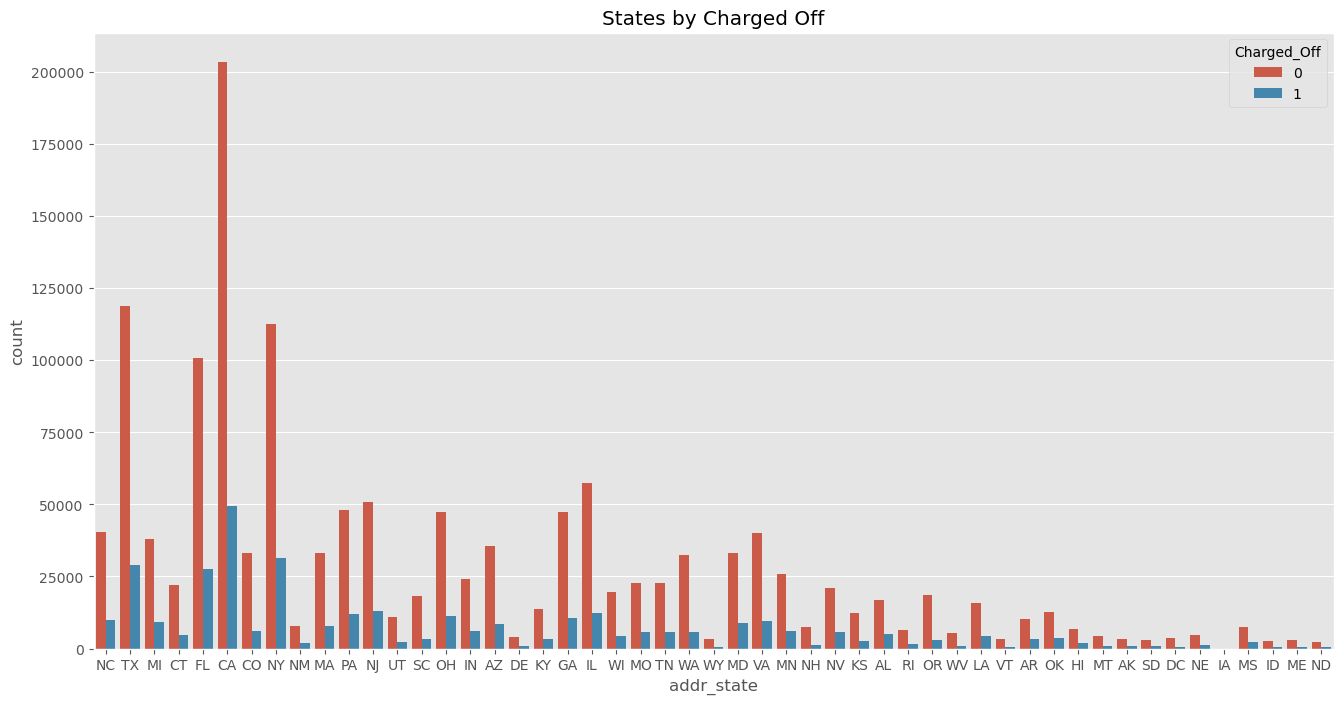

In [114]:
plt.figure(figsize=(16,8))
sns.countplot(x='addr_state',data=df,hue='Charged_Off')
plt.title('States by Charged Off')

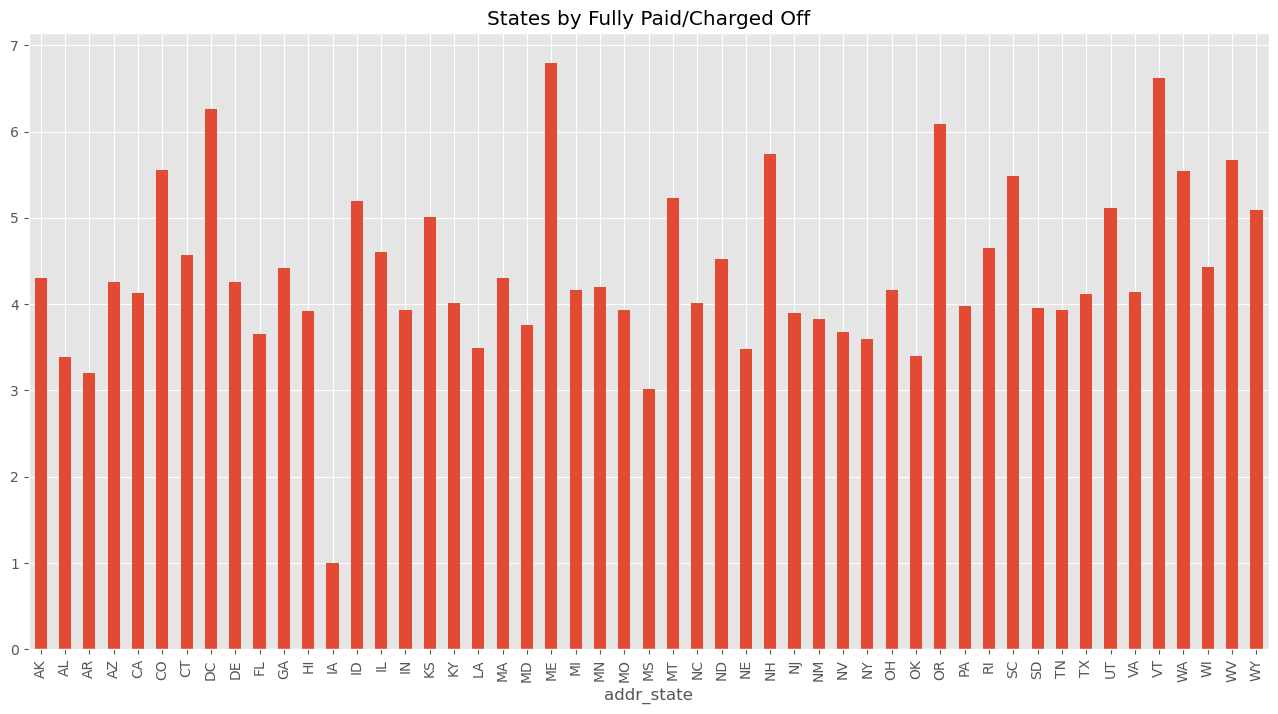

In [115]:
state_co = df[df['Charged_Off']==1].groupby('addr_state').count()['Charged_Off']
state_fp = df[df['Charged_Off']==0].groupby('addr_state').count()['Charged_Off']
plt.figure(figsize=(16,8))
(state_fp/state_co).plot(kind='bar')
plt.title('States by Fully Paid/Charged Off');

In [116]:
df[df.addr_state=='IA']['Charged_Off'].value_counts()

1    1
0    1
Name: Charged_Off, dtype: int64

In [117]:
df.drop('addr_state',axis=1,inplace=True)

In [118]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [119]:
df.initial_list_status.value_counts()

w    1176446
f     612786
Name: initial_list_status, dtype: int64

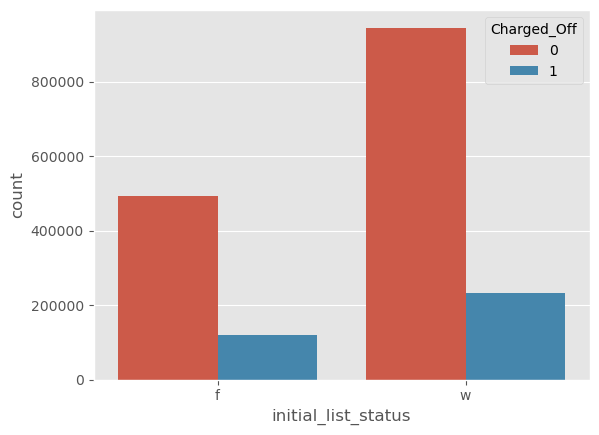

In [120]:
sns.countplot(x='initial_list_status',data=df,hue='Charged_Off');

In [121]:
df['home_ownership'].value_counts()

MORTGAGE    886017
RENT        702695
OWN         199256
ANY           1173
NONE            46
OTHER           45
Name: home_ownership, dtype: int64

In [122]:
df['home_ownership'].replace(['NONE','ANY','OTHER'],'RENT',inplace=True)

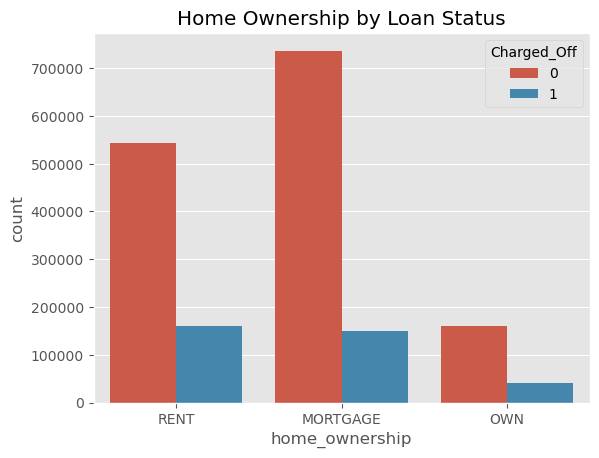

In [123]:
sns.countplot(x='home_ownership',data=df,hue='Charged_Off')
plt.title('Home Ownership by Loan Status');

In [124]:
df.verification_status.value_counts()

Source Verified    711853
Not Verified       562748
Verified           514631
Name: verification_status, dtype: int64

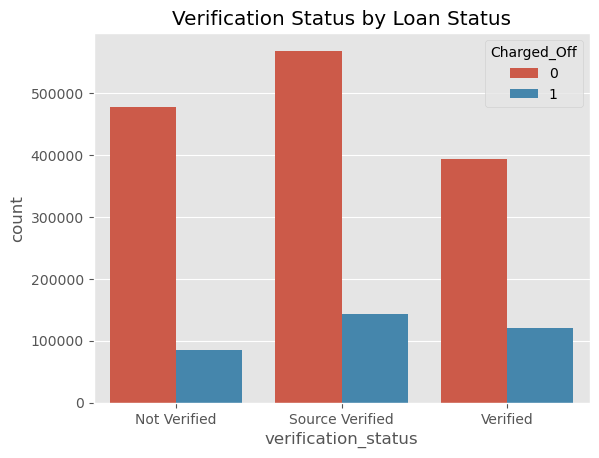

In [125]:
sns.countplot(x='verification_status',data=df,hue='Charged_Off')
plt.title('Verification Status by Loan Status');

In [126]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,Charged_Off,earliest_cr_year
42536,12000.0,36,10.99,B2,RENT,60000.0,Not Verified,2013,debt_consolidation,4.62,720.0,724.0,1.0,15.0,7137.0,24.0,f,3775.55,Individual,0.0,0.0,0,2009
42537,4800.0,36,10.99,B2,MORTGAGE,39600.0,Source Verified,2013,home_improvement,2.49,755.0,759.0,2.0,3.0,4136.0,16.1,w,3900.48,Individual,0.0,0.0,0,1995
42538,27050.0,36,10.99,B2,OWN,55000.0,Verified,2013,debt_consolidation,22.87,730.0,734.0,0.0,14.0,36638.0,61.2,w,6074.19,Individual,4.0,0.0,0,1986
42539,12000.0,36,7.62,A3,MORTGAGE,96500.0,Not Verified,2013,debt_consolidation,12.61,705.0,709.0,0.0,17.0,13248.0,55.7,f,2927.22,Individual,1.0,0.0,0,2003
42540,14000.0,36,12.85,B4,RENT,88000.0,Not Verified,2013,debt_consolidation,10.02,670.0,674.0,0.0,6.0,3686.0,81.9,f,470.47,Individual,0.0,1.0,0,1988


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789232 entries, 42536 to 2925492
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  int64  
 2   int_rate              float64
 3   sub_grade             object 
 4   home_ownership        object 
 5   annual_inc            float64
 6   verification_status   object 
 7   issue_d               int64  
 8   purpose               object 
 9   dti                   float64
 10  fico_range_low        float64
 11  fico_range_high       float64
 12  inq_last_6mths        float64
 13  open_acc              float64
 14  revol_bal             float64
 15  revol_util            float64
 16  initial_list_status   object 
 17  last_pymnt_amnt       float64
 18  application_type      object 
 19  mort_acc              float64
 20  pub_rec_bankruptcies  float64
 21  Charged_Off           int64  
 22  earliest_cr_year      int64  
dtypes: 

In [128]:
df['fico_range']=(df.fico_range_high+df.fico_range_low)/2
df.drop(['fico_range_low','fico_range_high'],axis=1,inplace=True)

In [130]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'], dtype='object')

In [131]:
df=pd.get_dummies(df,drop_first=True)

In [132]:
df.shape

(1789232, 69)

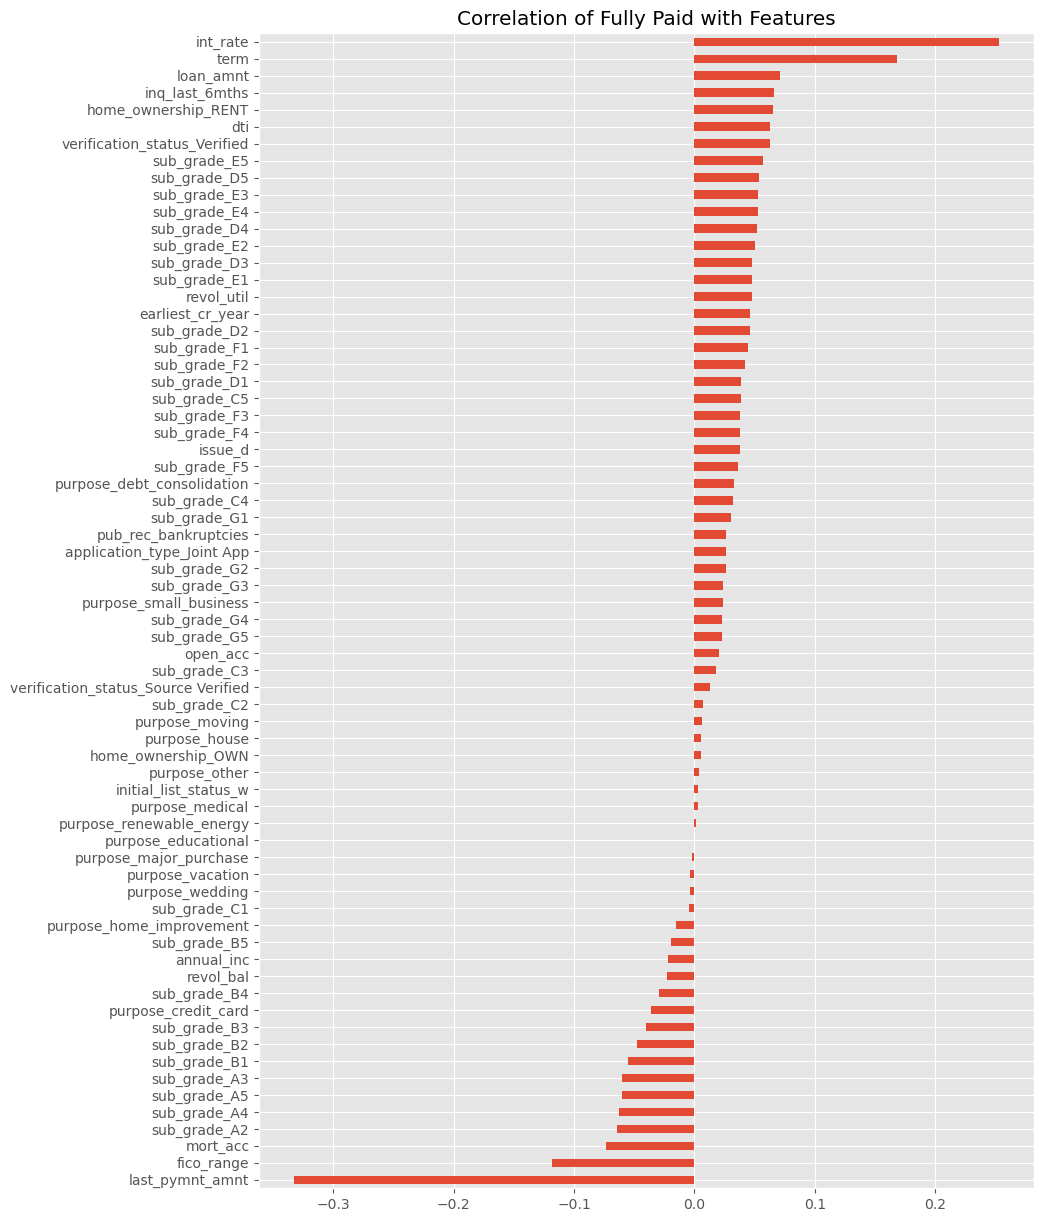

In [135]:
plt.figure(figsize=(10,15))
df.corr().Charged_Off.sort_values()[:-1].plot.barh()
plt.title('Correlation of Fully Paid with Features');

In [136]:
df.sample(10)

,loan_amnt,term,int_rate,annual_inc,issue_d,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,Charged_Off,earliest_cr_year,fico_range,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
1973184,20000.0,60,13.33,95000.0,2015,19.87,0.0,13.0,19765.0,62.5,458.45,4.0,0.0,1,2001,692.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2587357,15000.0,36,13.99,60000.0,2016,21.00,0.0,6.0,3066.0,49.5,6233.75,0.0,0.0,0,2005,662.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2626920,5000.0,36,12.74,35000.0,2016,13.37,0.0,14.0,12817.0,57.2,167.60,0.0,0.0,0,2001,677.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1899855,25000.0,60,16.99,65000.0,2015,34.09,1.0,16.0,27007.0,34.9,621.18,0.0,0.0,1,1998,717.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2268161,12000.0,60,9.49,125000.0,2015,22.10,1.0,15.0,41536.0,65.6,251.97,3.0,0.0,1,1996,667.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
719135,5000.0,36,7.21,90000.0,2018,11.67,0.0,8.0,10631.0,32.7,4532.81,2.0,0.0,0,2007,717.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
74827,22000.0,36,6.03,120000.0,2013,10.97,3.0,6.0,25836.0,36.2,669.26,5.0,0.0,0,1984,747.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1574821,12000.0,36,6.03,300000.0,2014,8.24,2.0,8.0,17311.0,50.2,3576.54,4.0,0.0,0,1991,747.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
312210,19200.0,36,7.07,160000.0,2017,3.50,0.0,14.0,2749.0,3.6,3830.69,3.0,0.0,0,1983,822.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2753511,20000.0,36,18.99,98000.0,2017,14.67,0.0,14.0,14381.0,40.2,7.93,4.0,0.0,0,2004,662.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
df.shape

(1789232, 69)

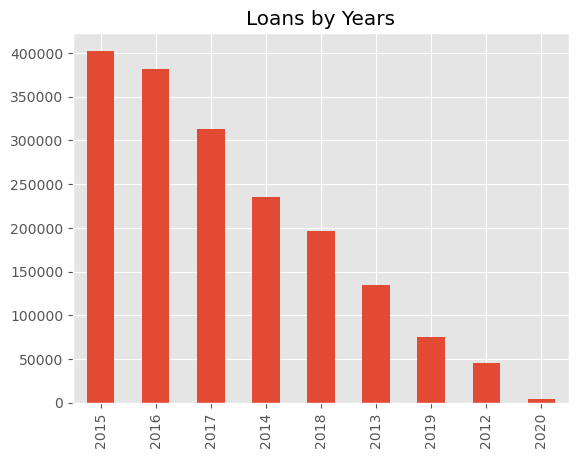

In [138]:
df.issue_d.value_counts().plot.bar()
plt.title('Loans by Years');

In [139]:
df.loc[df.issue_d.isin([2020,2019,2018])]

,loan_amnt,term,int_rate,annual_inc,issue_d,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,Charged_Off,earliest_cr_year,fico_range,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
472066,14100.0,36,23.87,128000.0,2018,14.12,0.0,12.0,11150.0,62.6,10759.27,3.0,0.0,0,2005,662.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
472067,20000.0,60,14.07,92000.0,2018,11.40,0.0,12.0,20176.0,46.2,466.10,0.0,0.0,1,2002,692.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
472072,7000.0,36,11.98,40000.0,2018,20.25,0.0,13.0,5004.0,36.0,5364.25,0.0,0.0,0,2007,697.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
472079,21000.0,60,20.39,85000.0,2018,15.76,0.0,15.0,14591.0,34.2,183.26,3.0,0.0,0,2008,667.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
472080,40000.0,60,9.43,150000.0,2018,4.09,0.0,6.0,4373.0,9.4,20264.30,0.0,1.0,0,1996,732.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867555,3500.0,36,10.81,173000.0,2020,2.39,0.0,12.0,1693.0,6.6,3450.03,3.0,0.0,0,2006,792.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1867557,2500.0,36,18.24,55858.0,2020,34.79,2.0,10.0,8589.0,46.4,2520.61,5.0,1.0,0,2004,682.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1867599,8000.0,36,10.19,116000.0,2020,15.35,1.0,13.0,6293.0,35.6,7939.83,2.0,0.0,0,2000,722.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1867684,2500.0,36,14.71,31000.0,2020,28.46,0.0,14.0,7460.0,16.3,2548.68,0.0,0.0,0,1991,707.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [140]:
df_sample=df.loc[df.issue_d.isin([2020,2019])]

In [141]:
df_sample.shape

(79264, 69)

In [142]:
list(df_sample.columns)

['loan_amnt',
 'term',
 'int_rate',
 'annual_inc',
 'issue_d',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'last_pymnt_amnt',
 'mort_acc',
 'pub_rec_bankruptcies',
 'Charged_Off',
 'earliest_cr_year',
 'fico_range',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'pur

In [143]:
print(df_sample.Charged_Off.value_counts(),'\n')
print(df_sample.Charged_Off.value_counts(normalize=True))

0    65778
1    13486
Name: Charged_Off, dtype: int64 

0    0.82986
1    0.17014
Name: Charged_Off, dtype: float64


In [144]:
x=df_sample.drop('Charged_Off',axis=1)
y=df_sample['Charged_Off']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, stratify=y,random_state=42)

In [145]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63411, 68)
(15853, 68)
(63411,)
(15853,)


In [147]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier().fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[12838   318]
 [  311  2386]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13156
           1       0.88      0.88      0.88      2697

    accuracy                           0.96     15853
   macro avg       0.93      0.93      0.93     15853
weighted avg       0.96      0.96      0.96     15853



In [148]:
rf_clf.feature_importances_

array([5.57393451e-02, 6.53168514e-03, 3.74627476e-02, 3.14291454e-02,
       6.65929682e-03, 3.49973879e-02, 9.77259226e-03, 2.48003473e-02,
       3.27532263e-02, 3.42798567e-02, 5.74711493e-01, 1.46672379e-02,
       3.69597319e-03, 2.59484605e-02, 2.77516262e-02, 1.67058168e-03,
       1.31101784e-03, 1.91898628e-03, 1.40434135e-03, 1.39136629e-03,
       1.22426895e-03, 1.35815720e-03, 1.65111889e-03, 1.46033475e-03,
       1.39673588e-03, 1.40837326e-03, 1.61321813e-03, 1.58242611e-03,
       1.80238009e-03, 1.42069890e-03, 2.21475244e-03, 1.75453173e-03,
       1.31860298e-03, 1.26497316e-03, 6.44424539e-04, 3.87065500e-04,
       2.78038882e-04, 3.38406845e-04, 4.87037717e-04, 3.84996098e-05,
       2.24668358e-05, 1.40290897e-05, 6.30909020e-06, 1.98848458e-05,
       1.00027662e-05, 7.78586061e-06, 7.40159135e-06, 0.00000000e+00,
       0.00000000e+00, 3.58494983e-03, 5.48771659e-03, 5.26069423e-03,
       4.39297196e-03, 4.10807324e-03, 5.34460576e-03, 0.00000000e+00,
      

Text(0.5, 1.0, 'Random Forest Feature Importance')

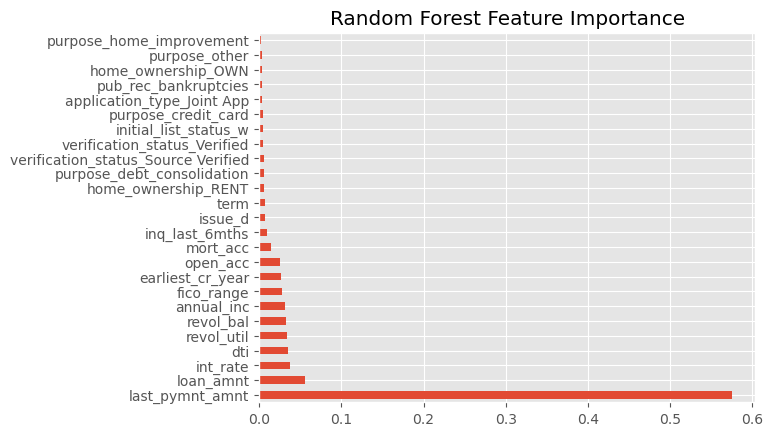

In [155]:
(pd.Series(rf_clf.feature_importances_, index=x.columns).nlargest(25).plot(kind='barh')) 
plt.title('Random Forest Feature Importance')